## 데이터 불러오기

In [1]:
import pandas as pd 

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- Weight : 무게
- Length : 길이
- Diagonal : 대각선 
- Height : 높이 
- Width : 너비 (두께)

## 데이터 확인

In [2]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

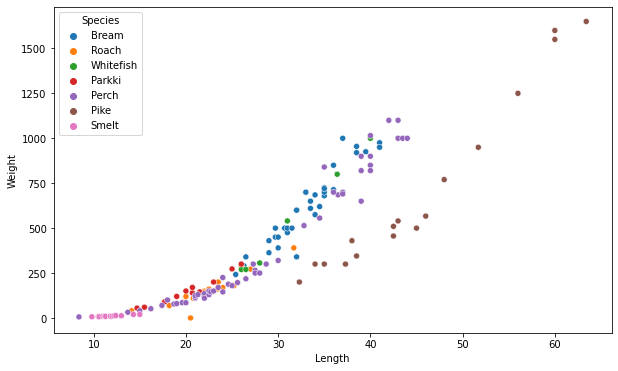

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data = fish, x = "Length", y = "Weight", hue = 'Species')
plt.show()

## 머신러닝을 위한 데이터 준비
- 행렬로 변환
  + pandas 데이터프레임

### Input 변수 변환 
- 독립변수

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


### Target 변수 변환
- 반응변수, 종속변수

In [5]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

## 데이터 세트 분리
- 훈련데이터와 테스트 데이터로 분리

In [6]:
from sklearn.model_selection import train_test_split 

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

## scaled 표준화
  + 서로 다른 단위를 표준화 시키는 것

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 머신러닝 모형 개발
- KNN 머신러닝

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- Bream이 첫번째 클래스, Parkki 두번째 클래스가... 

In [9]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 확률값으로 다시 추출

In [11]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[0.     0.     0.6667 0.     0.3333 0.     0.    ]

In [12]:
import pandas as pd
result = pd.DataFrame({
    'classes' : ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'], 
    'proba' : [0.,     0.,     0.6667, 0.,     0.3333, 0.,     0.    ]
})

result.T

,0,1,2,3,4,5,6
classes,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
proba,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0


In [13]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 새로운 알고리즘의 필요성
- 선형회귀 
  + 로지스틱 회귀
    - 딥러닝의 시작
- 유투브 강의 
  + 선형회귀에서 선형성 가정위반 --> 로지스틱 회귀, 식 유도
- 현재 주어진 데이터 
  - Weight : 무게
  - Length : 길이
  - Diagonal : 대각선 
  - Height : 높이 
  - Width : 너비 (두께)
- 확률값 구하기 공식
  + z = a * (Weight) + b * (Length) + .. + f
    - z가 매우 큰 음수 --> 0
    - z가 아주 큰 양수 --> 1
  + 시그모이드 함수를 사용한다. 

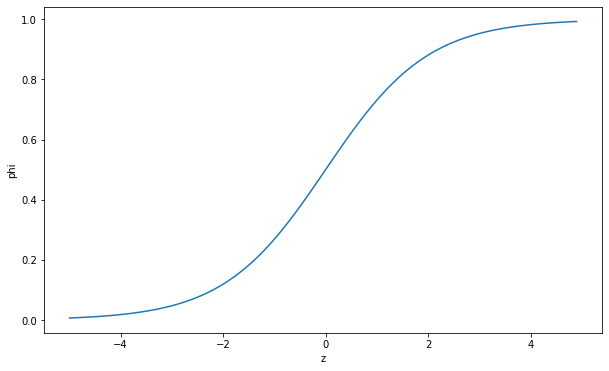

In [14]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(z, phi)
ax.set_xlabel('z')
ax.set_ylabel('phi')

plt.show()

### 로지스틱 회귀로 이진 분류 수행하기
- 주어진 데이터 
  + train_scaled & test_scaled
  + Bream, Smelt 


### Boolean Indexing
- True, False 값을 활용함. 

In [15]:
name_arr = np.array(['가', '나', '다', '라', '마'])
              # >180  <180 ....
boolean_arr = [True, False, True, False, False]

In [16]:
name_arr[boolean_arr]

array(['가', '다'], dtype='<U1')

- Bream & Smelt 가져올 것

In [17]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

- 새로운 데이터 생성

In [18]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

train_bream_smelt.shape, target_bream_smelt.shape

((33, 5), (33,))

- 모형 만들기

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [20]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [21]:
print(lr.classes_)

['Bream' 'Smelt']


In [22]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z = a * (무게) + ... + lr.intercept_
- 처음 5개 샘플의 z값을 출력하자. 

In [23]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 시그모이드 함수를 활용하여 각 데이터의 phi를 구하자. 

In [24]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [25]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


### 로지스틱 회귀로 다중 분류 수행하기

In [26]:
lr = LogisticRegression(C=20, max_iter = 1000) # ridge, Lasso,  Alpha와 반대개념
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [27]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 결정 트리 & 그 외 파생 모델들


In [30]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- alcohol : 알코올 도수
- sugar : 당도
- pH : pH 값
- class : 0이면 레드 와인 / 1이면 화이트 와인

## 요즘 트렌드
- LightGBM, XGBoost 잘 기억하자
- 위 두 모형은 Decision Tree에서 출발한다! 

## Wine 데이터 탐색

In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [32]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


- 데이터를 변경한다. 

In [34]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

- 데이터 세트 분리

In [36]:
# 코드 작성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

- 데이터 표준화
  - alcohol : 알코올 도수
  - sugar : 당도
  - pH : pH 값

In [37]:
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(train_input) 

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 모형 만들기

In [43]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [45]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 보고서 작성
  + 알코올 도수의 기울기는 0.51, 당도의 기울기는 1.67, ph의 기울기는 -0.68, 상수는 1.81

## 의사결정나무 (Decision Tree)
- 

(150, 4) (150,)
feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class names ['setosa' 'versicolor' 'virginica']


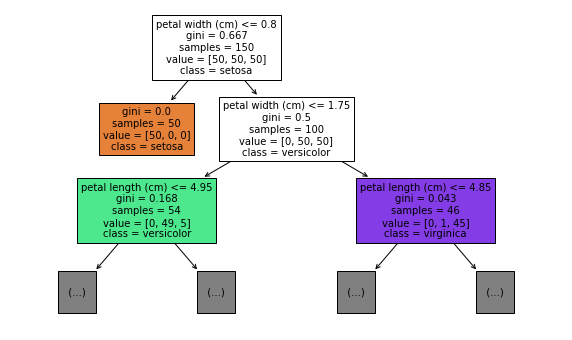

In [53]:
from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()
print(iris.data.shape, iris.target.shape)
print("feature names", iris.feature_names)
print("class names", iris.target_names)

# 모형 학습 및 plot_tree 그래프 구현
dt = DecisionTreeClassifier(random_state=0)
dt.fit(iris.data, iris.target)

fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_tree(dt, max_depth = 2, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)

# 과대적합
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


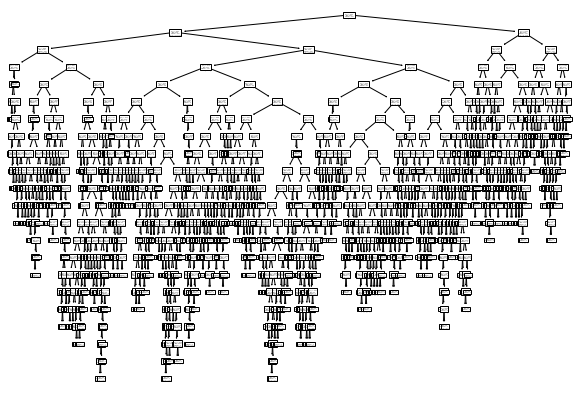

In [48]:
"""
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(10, 7))
plot_tree(dt)
plt.show()
"""

In [59]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

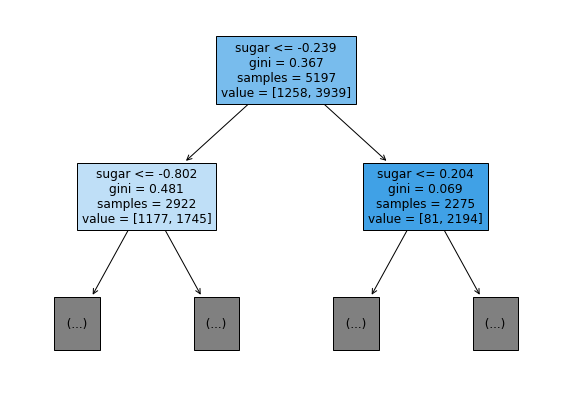

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_tree(dt, 
          max_depth = 1, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

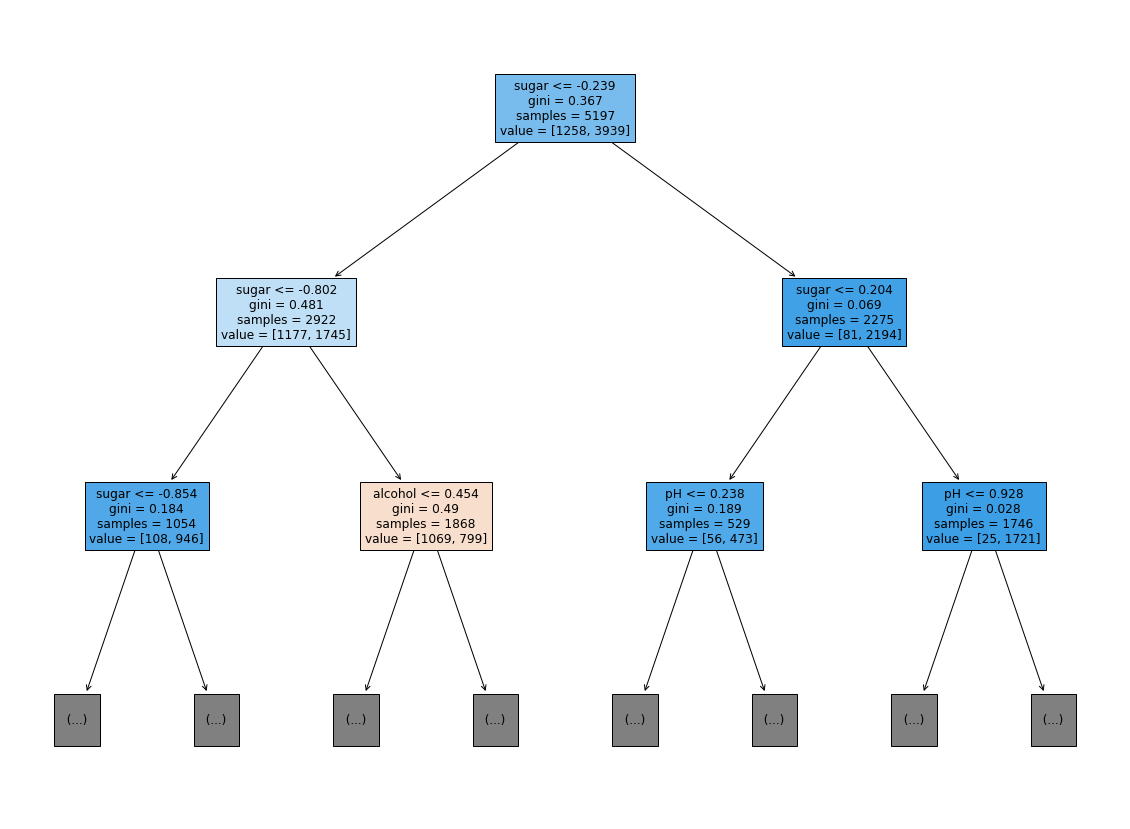

In [62]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(dt, 
          max_depth = 2, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

- 스케일 적용 안하고 다시 모델 생성

0.996921300750433
0.8584615384615385


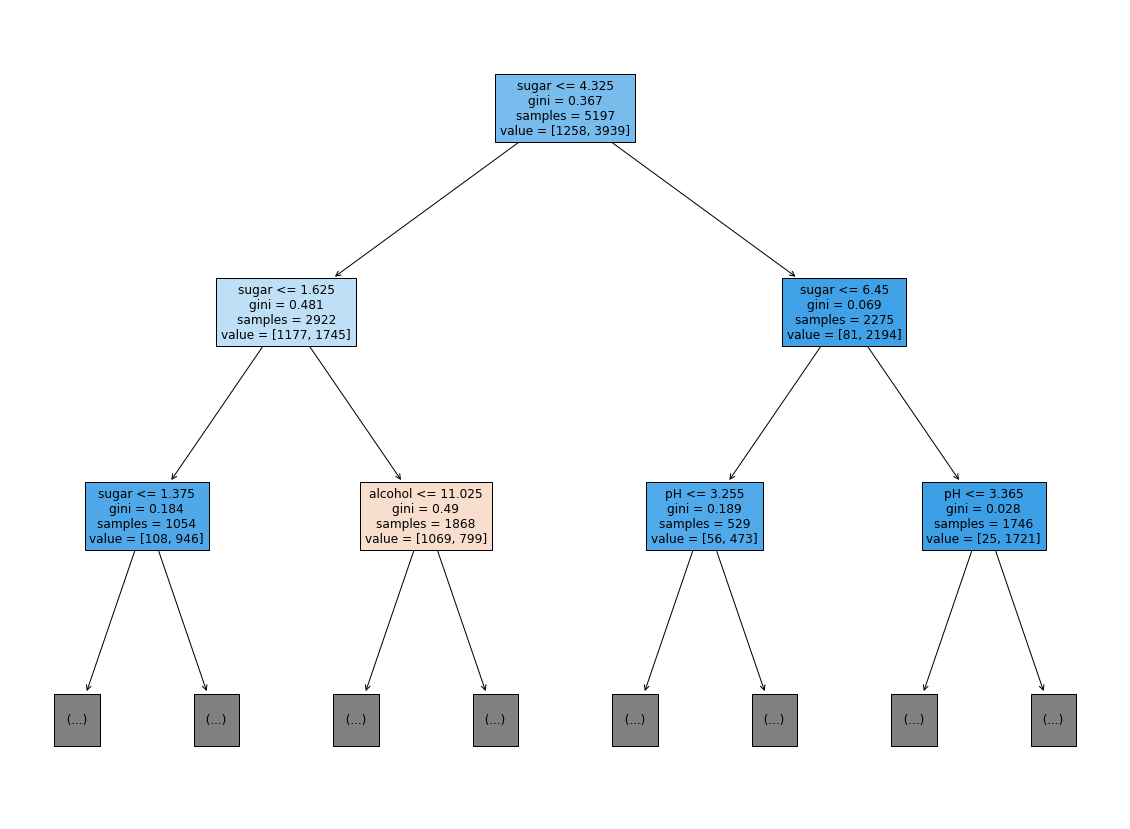

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 


train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42
)

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)

# 스케일 미 적용
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(dt, 
          max_depth = 2, 
          filled=True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42
)

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_input, train_target)

# 스케일 미 적용
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8584615384615385


In [72]:
# 과대적합 해소
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


## 교차 검증 & 그리드 서치
- 그리드 서치 : ridge, lasso alpha값 변경, max_depth 값 변경
- 교차 검증 : 여러 번 검증
  + 왜 여러 번 검증? 좀 더 정확하게 확인하기 위해서. 

### 샘플링에 대한 이해
- 가장 좋은 예: 여론조사
- 28일 결혼정보회사 듀오 산하의 듀오휴먼라이프연구소는 지난달 전국 25~39세 미혼남녀 1000명을 대상으로 결혼 인식에 대한 설문조사를 진행했다.
  + 남자 500명, 600명, 
  + 전국시도 17개 x 2 25세 서울~제주도

- 이상형의 조건
  + 남자, 여자 